In [158]:
import cv2
import numpy as np

In [159]:
from matplotlib import pyplot as plt

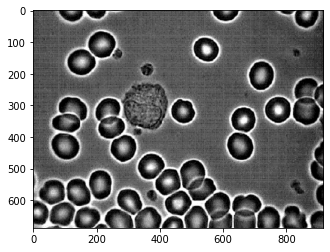

In [160]:
img = cv2.imread('cells.png', cv2.IMREAD_GRAYSCALE)

# cells_3.jpg
plt.imshow(img, cmap='gray')

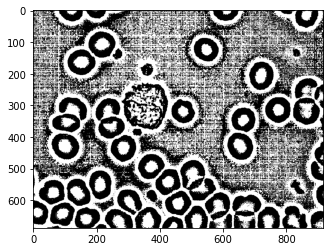

In [161]:
blur = cv2.blur(img, (5, 5))
# binarised = cv2.threshold(img, 100.0, 255.0, cv2.THRESH_BINARY)[1]
binarised = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 2)
plt.imshow(binarised, cmap='gray')

In [162]:
kernel_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
kernel_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

43


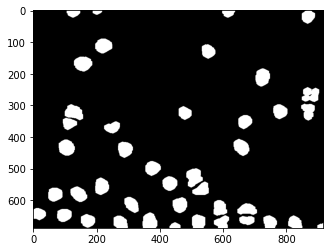

In [163]:
denoised = binarised.copy()
denoised = cv2.erode(denoised, kernel_5, iterations=1)
denoised = cv2.erode(denoised, kernel_2, iterations=2)
denoised = cv2.dilate(denoised, kernel_2, iterations=3)

denoised = cv2.floodFill(denoised, np.zeros((denoised.shape[0] + 2, denoised.shape[1] + 2), np.uint8), (0, 0), 255.0)[1]

denoised = cv2.dilate(denoised, kernel_5, iterations=2)
denoised = cv2.erode(denoised, kernel_2, iterations=6)

denoised = cv2.floodFill(denoised, np.zeros((denoised.shape[0] + 2, denoised.shape[1] + 2), np.uint8), (0, 0), 00.0)[1]

denoised = cv2.dilate(denoised, kernel_2, iterations=1)

denoised = cv2.erode(denoised, kernel_5, iterations=2)
denoised = cv2.erode(denoised, kernel_2, iterations=1)
denoised = cv2.dilate(denoised, kernel_5, iterations=4)
denoised = cv2.erode(denoised, kernel_5, iterations=2)
denoised = cv2.dilate(denoised, kernel_5, iterations=3)

plt.imshow(denoised, cmap='gray')

contours, _ = cv2.findContours(denoised, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_coins = len(contours)
print(all_coins)
